# 3. Úvod do lineární algebry

In [3]:
import time
import numpy as np
rng = np.random.default_rng()

def measure(function, generator, n=1, to_string=False):
  """
  Změří a vrátí průměrný čas vykonání funkce při n pokusech v milisekundách.

  Parametr function: funkce ke změření

  Parametr generator: funkce která každý pokus vygeneruje náhodné hodnoty pro funkci function

  Parametr n: počet pokusů

  Parametr to_string: pokud True, vrátí čas jako string
  """
  time_sum = 0
  for i in range(n):
    if callable(generator):
      args = generator()
    else:
      args = generator

    if isinstance(args, tuple):
      start = time.time()
      function(*args)
    else:
      start = time.time()
      function(args)

    end = time.time()
    
    time_sum += end - start

  return str(time_sum / n * 1000) + " ms" if to_string else time_sum / n * 1000

In [2]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng()

def vygeneruj_soustavu(n):
  """
  Vrací matici náhodně vygenerované soustavy rovnic která má řešení a její výsledky.

  Parametr n: počet rovnic v soustavě
  """

  vysledky = [rng.integers(-10, 10) for _ in range(n)]

  while True:
    matice = []
    druha_strana_rovnic = []

    for rovnice in range(n):
      koeficienty = [rng.integers(-10, 10) for _ in range(n)]

      matice.append(koeficienty)

      sum = 0
      for x, k in zip(vysledky, koeficienty):
        sum += k * x
      druha_strana_rovnic.append(sum)
    
    if np.linalg.det(matice) != 0: return vysledky, matice, druha_strana_rovnic  

def jacobiho_metoda(A, b):
    x = np.ones(len(A))
    D = np.diag(A)
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    for i in range(5):
        x = (b - np.matmul((L + U), x)) / D
    return x

# vygeneruje k matic pro každou velikost n
k = 10
velikosti_matic = range(2, 1202, 100)
vygenerovane_soustavy = [[vygeneruj_soustavu(n) for _ in range(k)] for n in velikosti_matic]

/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in matmul


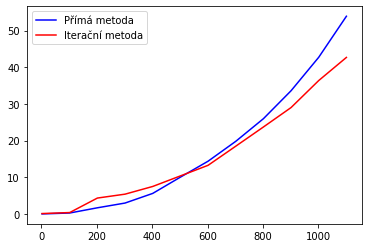

In [4]:
casy_prime_metody = [0 for _ in velikosti_matic]
casy_iteracni_metody = [0 for _ in velikosti_matic]
i = 0
for n in velikosti_matic:
  soustavy_velikosti_n = vygenerovane_soustavy[i]
  for soustava in soustavy_velikosti_n:
    matice = np.array(soustava[1])
    druha_strana_rovnic = np.array(soustava[2])
    
    # Přímá metoda (LU rozložení)
    casy_prime_metody[i] += measure(
      np.linalg.solve,
      (matice, druha_strana_rovnic),
      10
    )

    # Iterační metoda
    casy_iteracni_metody[i] += measure(
      jacobiho_metoda,
      (matice, druha_strana_rovnic),
      10
    )

  casy_prime_metody[i] /= k
  casy_iteracni_metody[i] /= k
  i+=1

plt.plot(velikosti_matic, casy_prime_metody, "b-", label="Přímá metoda")
plt.plot(velikosti_matic, casy_iteracni_metody, "r-", label="Iterační metoda")
plt.legend()
plt.show()